In [155]:
from qiskit import *
import numpy as np

from qiskit.tools.visualization import plot_bloch_multivector

circuit = QuantumCircuit(3, 3)


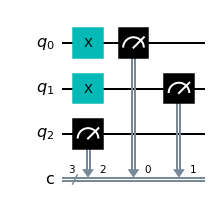

In [156]:
# flip 2 first qubits
circuit.x([0, 1])

# measure all qubits
circuit.measure([0, 1, 2], [0, 1, 2])

%matplotlib inline
circuit.draw('mpl')

In [157]:
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram

# simulate the circuit
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

print(counts)

{'011': 1000}


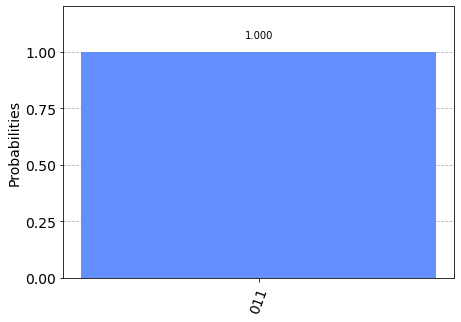

In [158]:
plot_histogram(counts)

In [159]:
# hlaf adder circuit
def half_adder(bit1, bit2):
    # create quantum register
    qubits = QuantumRegister(3, name = "q")

    # classical bits register
    cbits = ClassicalRegister(3, name = 'c')

    # create circuit
    circuit = QuantumCircuit(qubits, cbits)

    # flit qubits if needed based on bit inputs
    if bit1 == 1 :
        circuit.x(0)

    if bit2 == 1:
        circuit.x(1)

    # add xor ooperation in 3d qubit with 2 cnot gates
    circuit.cx(0, 2)
    circuit.cx(1, 2)

    # measure the 2 qubits
    circuit.measure(qubits, cbits)

    return circuit

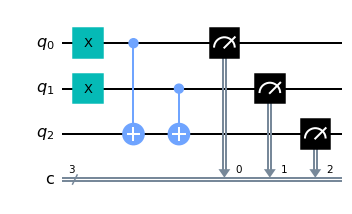

In [160]:
# create half adder and print it
circuit = half_adder(1, 1)

circuit.draw('mpl')

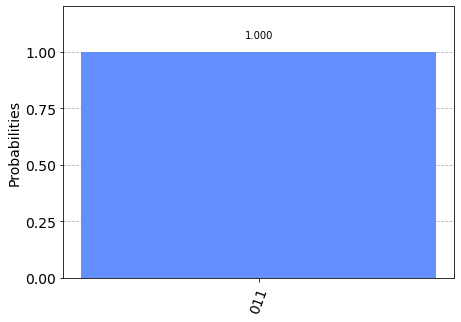

In [161]:
# simulate the circuit
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

In [162]:
# full adder
def full_adder(bit1, bit2) :
    # create quantum register
    qubits = QuantumRegister(4, name = "q")

    # classical bits register
    cbits = ClassicalRegister(2, name = 'c')

    # create circuit
    circuit = QuantumCircuit(qubits, cbits)

    # flit qubits if needed based on bit inputs
    if bit1 == 1 :
        circuit.x(0)

    if bit2 == 1:
        circuit.x(1)

    # add xor ooperation in 3d qubit with 2 cnot gates
    circuit.cx(0, 2)
    circuit.cx(1, 2)

    # to keep the remaining 1 if both bits are 1, we will store it in the extra qubit
    circuit.ccx(0, 1, 3)

    # measure the 2 qubits
    circuit.measure([2, 3], cbits)

    return circuit

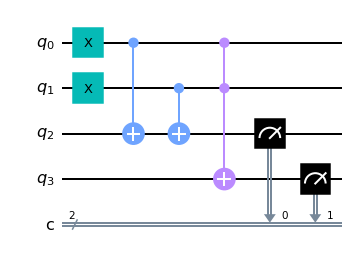

In [163]:
circuit = full_adder(1, 1)

circuit.draw('mpl')

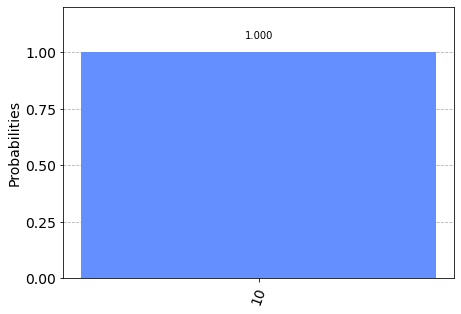

In [164]:
# simulate the circuit
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)